In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,                              
                                    rotation_range=5,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode='nearest'
                                    )

valid_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [4]:
train_dataset  = train_datagen.flow_from_directory(directory = r'C:\Users\acer\Downloads\archive (2)\Data\train',
                                                   target_size = (75,75),
                                                   class_mode = 'categorical',
                                                   batch_size = 128)
valid_dataset = valid_datagen.flow_from_directory(directory = r'C:\Users\acer\Downloads\archive (2)\Data\valid',
                                                  target_size = (75,75),
                                                  class_mode = 'categorical',
                                                  batch_size = 128)

test_dataset = test_datagen.flow_from_directory(directory = r'C:\Users\acer\Downloads\archive (2)\Data\test',
                                                  target_size = (75,75),
                                                  class_mode = 'categorical',
                                                  batch_size = 128)


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 283 images belonging to 4 classes.


(128, 75, 75, 3)
(128, 4)


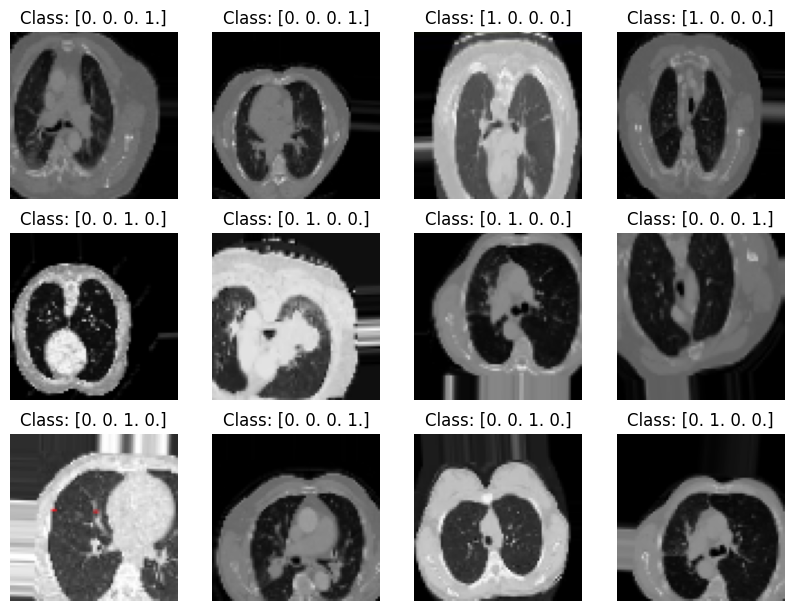

In [9]:
import matplotlib.pyplot as plt

# Get iterator for batch of data
iterator = iter(train_dataset)
images, labels = next(iterator)
print(images.shape)
print(labels.shape)

# Plot the images
plt.figure(figsize=(10, 10))
for i in range(12):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i])
    plt.title('Class: {}'.format(labels[i]))
    plt.axis('off')
plt.show()

# Reset batch index to 0 (assuming you want to reset the iterator)
iterator.batch_index = 0


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,GlobalAveragePooling2D,Dropout

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(75, 75, 3), padding = "same"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])
model.summary()

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 75, 75, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 35, 35, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 497,396 (1.90 MB)

 Trainable params: 497,396 (1.90 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=20, validation_data=valid_dataset)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.6776 - loss: 0.6970 - val_accuracy: 0.3611 - val_loss: 1.7309
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.6975 - loss: 0.6622 - val_accuracy: 0.5417 - val_loss: 1.2136
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.7195 - loss: 0.6308 - val_accuracy: 0.4722 - val_loss: 1.3339
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.7146 - loss: 0.6488 - val_accuracy: 0.6250 - val_loss: 0.9494
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.6921 - loss: 0.6263 - val_accuracy: 0.4722 - val_loss: 1.0878
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.7409 - loss: 0.6399 - val_accuracy: 0.6250 - val_loss: 0.8499
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.6981 - loss: 0.6363 - val_accuracy: 0.3611 - val_loss: 1.5043
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.6992 - loss: 0.6230 - val_accuracy: 0.5278 - val_loss:

c:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2869 - loss: 2.2046 
0.30035334825515747


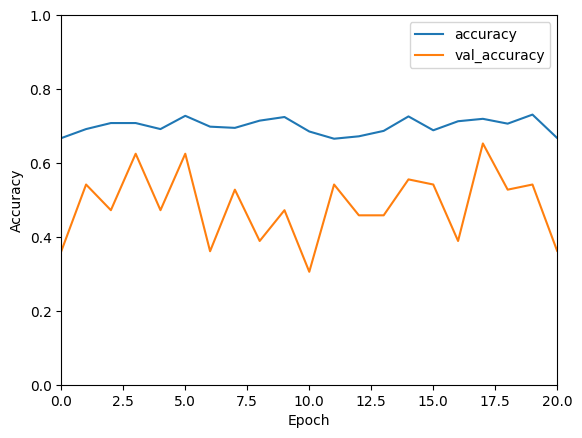

In [22]:
plt.plot(history.history['accuracy']*100, label='accuracy')
plt.plot(history.history['val_accuracy']*100, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([0, 20])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(test_dataset, verbose=1)
print(test_acc)


In [24]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model pre-trained on ImageNet data
model = VGG16(weights='imagenet', include_top=True)

# Now you can use the VGG16 model for your tasks


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 33s 0us/step


In [25]:
model = VGG16(input_shape=(75,75,3),include_top=False,weights="imagenet")
# Freeze the convolutional layers so that they are not trainable
for layer in model.layers:
    layer.trainable = False

x = model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(256, activation='relu')(x)  # Dense layer with 256 neurons
predictions = Dense(4, activation='softmax')(x)  # Output layer with 4 classes and softmax activation

model = Model(inputs=model.input, outputs=predictions)
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 75, 75, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 75, 75, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 18, 18, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 18, 18, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,044 (56.64 MB)

 Trainable params: 132,356 (517.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [26]:

model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 908ms/step - accuracy: 0.3045 - loss: 1.4247 - val_accuracy: 0.2917 - val_loss: 1.3664
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 799ms/step - accuracy: 0.3871 - loss: 1.2711 - val_accuracy: 0.4444 - val_loss: 1.3094
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 815ms/step - accuracy: 0.5092 - loss: 1.2003 - val_accuracy: 0.4028 - val_loss: 1.2749
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 793ms/step - accuracy: 0.5188 - loss: 1.1323 - val_accuracy: 0.4028 - val_loss: 1.2235
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 835ms/step - accuracy: 0.5183 - loss: 1.1215 - val_accuracy: 0.4583 - val_loss: 1.2318
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 837ms/step - accuracy: 0.5329 - loss: 1.0847 - val_accuracy: 0.4306 - val_loss: 1.2013
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 825ms/step - accuracy: 0.5307 - loss: 1.0573 - val_accuracy: 0.4306 - val_loss: 1.1592
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 824ms/step - accuracy: 0.5346 - loss: 1.0360 - val_accuracy: 0.4583 - val_loss:

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 435ms/step - accuracy: 0.4276 - loss: 1.2104
0.42756184935569763


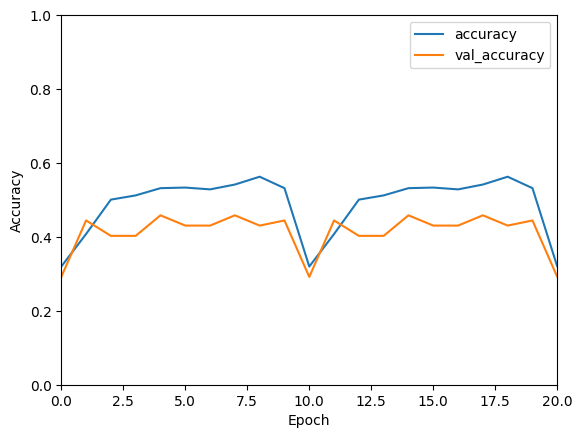

In [27]:
plt.plot(history.history['accuracy']*100, label='accuracy')
plt.plot(history.history['val_accuracy']*100, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([0, 20])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(test_dataset, verbose=1)
print(test_acc)

In [34]:
from tensorflow.keras.applications import VGG19

# Load the VGG16 model pre-trained on ImageNet data
model = VGG16(weights='imagenet', include_top=True)

# Now you can use the VGG16 model for your tasks


In [35]:
model = VGG19(input_shape=(75,75,3),include_top=False,weights="imagenet")
# Freeze the convolutional layers so that they are not trainable
for layer in model.layers:
    layer.trainable = False

x = model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(256, activation='relu')(x)  # Dense layer with 256 neurons
predictions = Dense(4, activation='softmax')(x)  # Output layer with 4 classes and softmax activation

model = Model(inputs=model.input, outputs=predictions)
model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 75, 75, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 75, 75, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 18, 18, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 18, 18, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 18, 18, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,156,740 (76.89 MB)

 Trainable params: 132,356 (517.02 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [36]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.2551 - loss: 1.5956 - val_accuracy: 0.3194 - val_loss: 1.3860
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 986ms/step - accuracy: 0.3271 - loss: 1.3291 - val_accuracy: 0.3889 - val_loss: 1.3366
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 989ms/step - accuracy: 0.4242 - loss: 1.2314 - val_accuracy: 0.3611 - val_loss: 1.2705
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 999ms/step - accuracy: 0.4963 - loss: 1.1478 - val_accuracy: 0.4583 - val_loss: 1.2177
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5254 - loss: 1.0996 - val_accuracy: 0.4583 - val_loss: 1.2388
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4931 - loss: 1.0727 - val_accuracy: 0.4028 - val_loss: 1.1660
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5201 - loss: 1.0420 - val_accuracy: 0.4583 - val_loss: 1.1577
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5590 - loss: 1.0279 - val_accuracy: 0.4167 - val_loss: 1.1958
Epoch 9

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 573ms/step - accuracy: 0.4919 - loss: 1.1280
0.48763251304626465


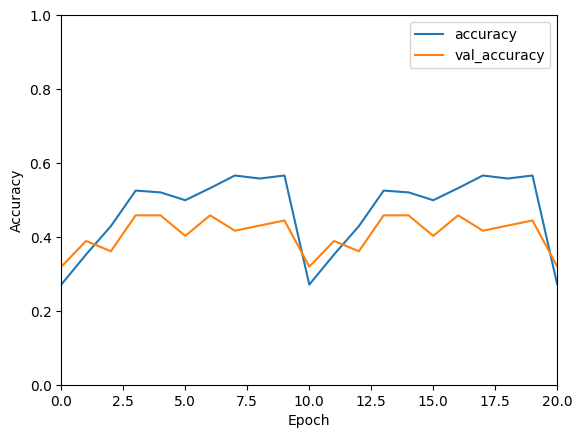

In [37]:
plt.plot(history.history['accuracy']*100, label='accuracy')
plt.plot(history.history['val_accuracy']*100, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([0, 20])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(test_dataset, verbose=1)
print(test_acc)

In [40]:
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model pre-trained on ImageNet data
model = ResNet50(weights='imagenet', include_top=True)

# Now you can use the ResNet50 model for your tasks


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [41]:
model = ResNet50(input_shape=(75,75,3),include_top=False,weights="imagenet")
# Freeze the convolutional layers so that they are not trainable
for layer in model.layers:
    layer.trainable = False

x = model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(256, activation='relu')(x)  # Dense layer with 256 neurons
predictions = Dense(4, activation='softmax')(x)  # Output layer with 4 classes and softmax activation

model = Model(inputs=model.input, outputs=predictions)
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 75, 75, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 81, 81, 3) │          0 │ input_layer_8[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 38, 38,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 38, 38,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 38, 38,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 40, 40,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 19, 19,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 19, 19,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 19, 19,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 19, 19,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 19, 19,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 19, 19,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 19, 19,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 19, 19,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 19, 19,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 19, 19,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 19, 19,    │      1,024 │ conv2_block1_3_c

 Total params: 24,113,284 (91.98 MB)

 Trainable params: 525,572 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 328ms/step - accuracy: 0.1594 - loss: 0.7780
Test accuracy: 0.16254417598247528


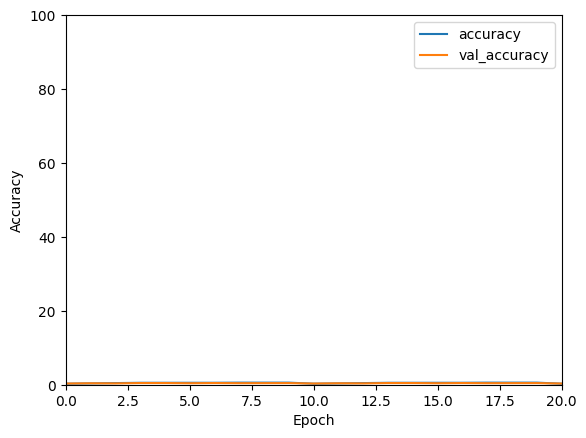

In [43]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'] * 100, label='accuracy')
plt.plot(history.history['val_accuracy'] * 100, label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 100])  # Adjusted the y-axis limit to percentage scale
plt.xlim([0, 20])
plt.legend(loc='upper right')

# Ensure model is compiled before evaluation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset, verbose=1)
print('Test accuracy:', test_acc)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step - accuracy: 0.1555 - loss: 0.7800
0.16254417598247528


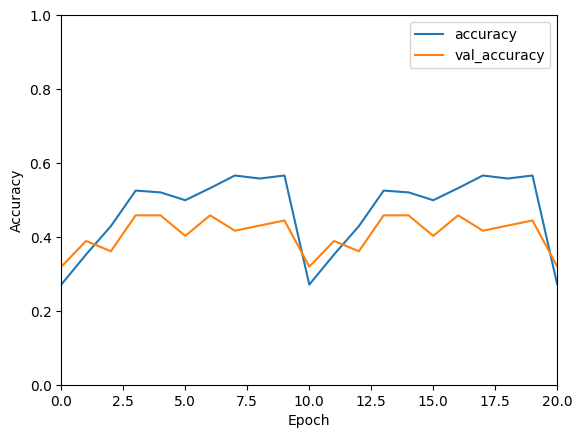

In [44]:
plt.plot(history.history['accuracy']*100, label='accuracy')
plt.plot(history.history['val_accuracy']*100, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([0, 20])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(test_dataset, verbose=1)
print(test_acc)

In [47]:
from tensorflow.keras.applications import InceptionV3

# Load the VGG16 model pre-trained on ImageNet data
model = InceptionV3(weights='imagenet', include_top=True)

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [48]:
model = InceptionV3(input_shape=(75,75,3),include_top=False,weights="imagenet")
# Freeze the convolutional layers so that they are not trainable
for layer in model.layers:
    layer.trainable = False

x = model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(256, activation='relu')(x)  # Dense layer with 256 neurons
predictions = Dense(4, activation='softmax')(x)  # Output layer with 4 classes and softmax activation

model = Model(inputs=model.input, outputs=predictions)
model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 75, 75, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 37, 37,    │        864 │ input_layer_10[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 37, 37,    │         96 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 37, 37,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 35, 35,    │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │         96 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_99 (Conv2D)  │ (None, 35, 35,    │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        192 │ conv2d_99[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 17, 17,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_100 (Conv2D) │ (None, 17, 17,    │      5,120 │ max_pooling2d_7[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 17, 17,    │        240 │ conv2d_100[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 17, 17,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_101 (Conv2D) │ (None, 15, 15,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        576 │ conv2d_101[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 15, 15,    │          0 │ batch_normalizat

 Total params: 22,328,356 (85.18 MB)

 Trainable params: 525,572 (2.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [50]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - accuracy: 0.3476 - loss: 0.7591
0.35335689783096313


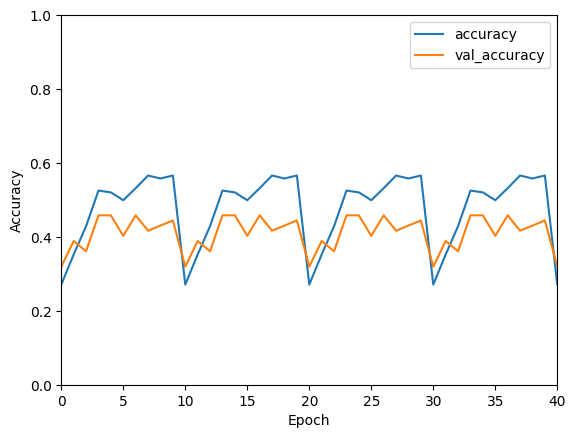

In [51]:
plt.plot(history.history['accuracy']*100, label='accuracy')
plt.plot(history.history['val_accuracy']*100, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([0, 40])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(test_dataset, verbose=1)
print(test_acc)

In [52]:
from tensorflow.keras.applications import  EfficientNetB0

# Load the VGG16 model pre-trained on ImageNet data
model =  EfficientNetB0(weights='imagenet', include_top=True)

21834768/21834768 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [53]:
model = EfficientNetB0(input_shape=(75,75,3),include_top=False,weights="imagenet")
# Freeze the convolutional layers so that they are not trainable
for layer in model.layers:
    layer.trainable = False

x = model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(256, activation='relu')(x)  # Dense layer with 256 neurons
predictions = Dense(4, activation='softmax')(x)  # Output layer with 4 classes and softmax activation

model = Model(inputs=model.input, outputs=predictions)
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 75, 75, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 75, 75, 3) │          0 │ input_layer_12[0… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 75, 75, 3) │          7 │ rescaling_2[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 75, 75, 3) │          0 │ normalization_1[… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 77, 77, 3) │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 38, 38,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 38, 38,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 38, 38,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 38, 38,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 38, 38,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 38, 38,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 38, 38,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 38, 38,    │        512 │ block1a_se_excit

 Total params: 4,378,535 (16.70 MB)

 Trainable params: 328,964 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [54]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - accuracy: 0.1872 - loss: 0.7434
0.19081272184848785


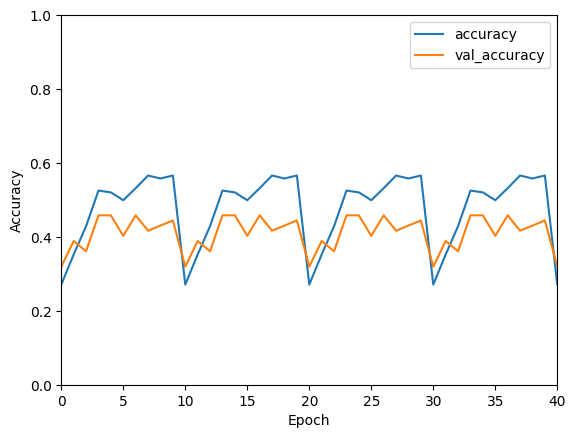

In [55]:
plt.plot(history.history['accuracy']*100, label='accuracy')
plt.plot(history.history['val_accuracy']*100, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([0, 40])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(test_dataset, verbose=1)
print(test_acc)